In [48]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report

dataset_path = "asl_dataset"
img_width, img_height = 160, 160
num_classes = 36

# Load the data and split into training and validation sets
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create the CNN model



Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [49]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [51]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

model.save("sign_language_model.h5")



Epoch 1/10
63/63 [==============================] - 33s 513ms/step - loss: 0.8059 - accuracy: 0.8310 - val_loss: 0.7132 - val_accuracy: 0.8350
Epoch 2/10
63/63 [==============================] - 33s 525ms/step - loss: 0.5558 - accuracy: 0.9105 - val_loss: 0.6769 - val_accuracy: 0.8787
Epoch 3/10
63/63 [==============================] - 33s 522ms/step - loss: 0.4965 - accuracy: 0.9339 - val_loss: 0.7441 - val_accuracy: 0.8767
Epoch 4/10
63/63 [==============================] - 33s 526ms/step - loss: 0.4556 - accuracy: 0.9508 - val_loss: 0.7698 - val_accuracy: 0.8549
Epoch 5/10
63/63 [==============================] - 33s 518ms/step - loss: 0.4167 - accuracy: 0.9642 - val_loss: 0.6720 - val_accuracy: 0.8907
Epoch 6/10
63/63 [==============================] - 33s 518ms/step - loss: 0.4302 - accuracy: 0.9573 - val_loss: 0.7189 - val_accuracy: 0.8748
Epoch 7/10
63/63 [==============================] - 33s 515ms/step - loss: 0.3971 - accuracy: 0.9657 - val_loss: 0.6941 - val_accuracy: 0.8787

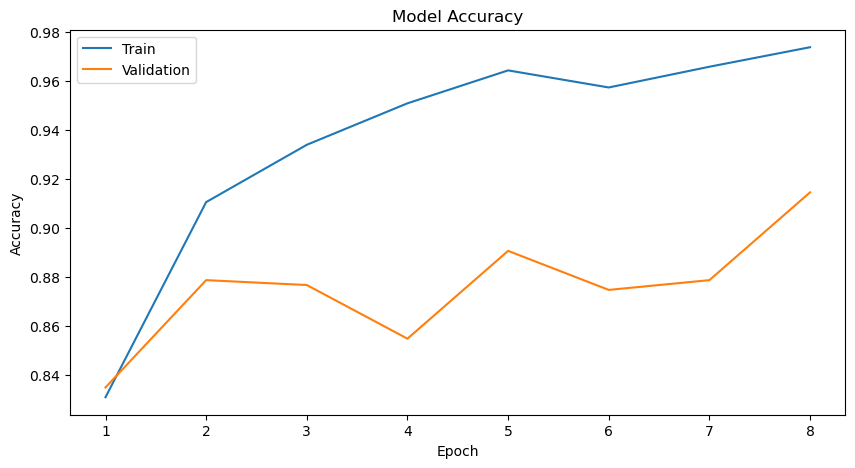

In [52]:
# Plot the training and validation accuracy
plt.figure(figsize = (10, 5))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

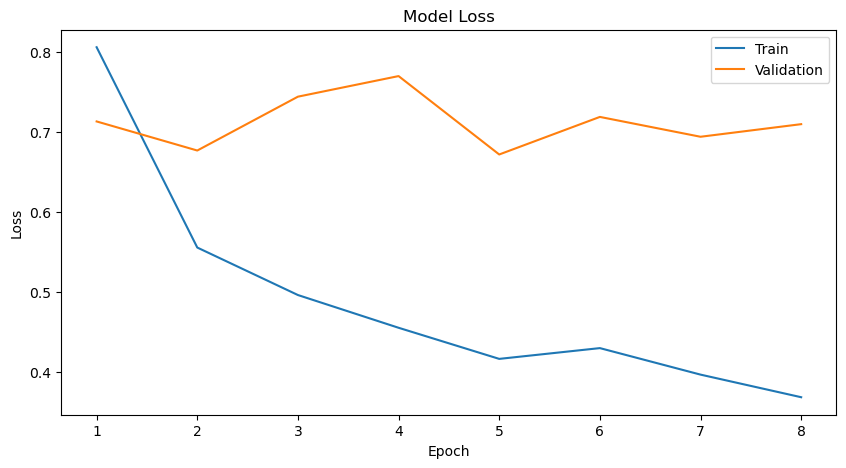

In [53]:
# Plot the training and validation loss
plt.figure(figsize = (10, 5))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [59]:
loaded_model = tf.keras.models.load_model("sign_language_model.h5")

# Generate predictions for the test set
test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_true = test_generator.classes
y_pred = np.argmax(loaded_model.predict(test_generator), axis=1)

# Generate and print the classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

Found 2515 images belonging to 36 classes.
79/79 [==============================] - 14s 169ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        70
           1       0.96      1.00      0.98        70
           2       0.83      0.99      0.90        70
           3       0.99      1.00      0.99        70
           4       0.93      1.00      0.97        70
           5       1.00      0.96      0.98        70
           6       0.88      0.93      0.90        70
           7       1.00      0.97      0.99        70
           8       1.00      0.97      0.99        70
           9       0.97      1.00      0.99        70
           a       0.93      0.99      0.96        70
           b       1.00      1.00      1.00        70
           c       1.00      1.00      1.00        70
           d       0.97      1.00      0.99        70
           e       1.00      1.00      1.00        70
           f       1.00      1.00   